# **Project Name**: Netflix & The Office Analysis


Project Type: Domain Project (Entertainment / Media Analytics)



 Project Prepared by: Aryan Singh


GitHub Link:

### **Project Summary :**
This project explores **Netflix content trends** and **The Office (US) series**.  
### **We uncover :**
- Netflix’s content growth by type, country, and genre.  
- *The Office* ratings, seasons, guest stars, and viewership.  
- Combined insights on comedy content growth vs. *The Office*.  

## **Problem Statement :**
OTT platforms have exploded in popularity. Understanding **what drives viewership and ratings** is crucial.  
### **Key questions:**  
1. What dominates Netflix – Movies or TV Shows?  
2. Which countries/genres lead Netflix’s library?  
3. What made *The Office* successful, and how did ratings vary?  
4. Did guest stars affect ratings?  
5. How does *The Office* fit into Netflix’s broader comedy growth?

## **Coding Section :**

## **Import Libraries**

In [7]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")


## **Dataset Loading**


In [19]:
# Data Load

from google.colab import drive
drive.mount('/content/drive')

netflix = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv", encoding = "latin1")
office = pd.read_csv("/content/drive/MyDrive/the_office_series.csv",encoding = "latin1")

print("Netflix Dataset Shape:", netflix.shape)
print("The Office Dataset Shape:", office.shape)

display(netflix.head())
display(office.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Netflix Dataset Shape: (8809, 26)
The Office Dataset Shape: (188, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


#Data Cleaning

In [22]:
#  Data Cleaning

# Netflix
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix['year_added'] = netflix['date_added'].dt.year

# Office
office['Date'] = pd.to_datetime(office['Date'], errors='coerce')
office['has_guest'] = office['GuestStars'].notnull()


# **Netflix Analysis**

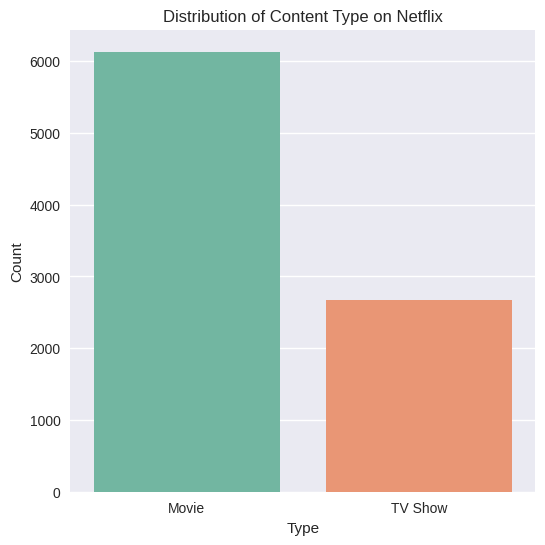

In [23]:
# 1. Content Type Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=netflix, x='type', palette="Set2")
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


###** Why this plot ?**
To check Netflix’s library composition between Movies and TV Shows.
### **Insights :**
- Netflix library is dominated by Movies (~70%).  
- TV Shows (~30%) are fewer, but growing steadily in recent years.  


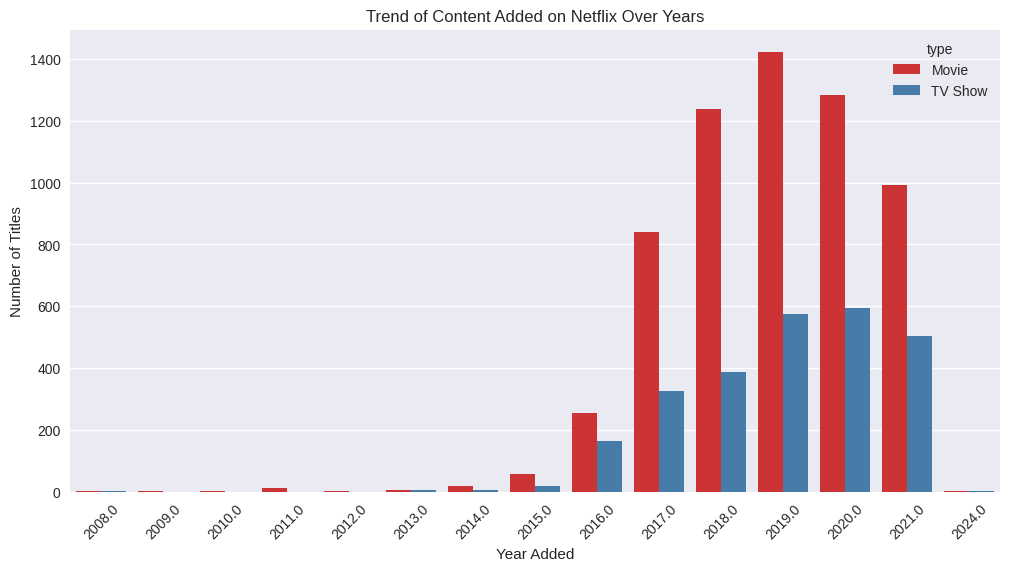

In [24]:
# 2. Content Added Over Time
plt.figure(figsize=(12,6))
sns.countplot(data=netflix, x='year_added', hue='type', palette="Set1")
plt.title("Trend of Content Added on Netflix Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


### **Why this plot ?**
To understand Netflix’s growth trend over time.  
### **Insights:**
- Rapid growth after 2015 as Netflix expanded globally.  
- 2019–2020 saw the maximum additions (pandemic-driven streaming boom).  


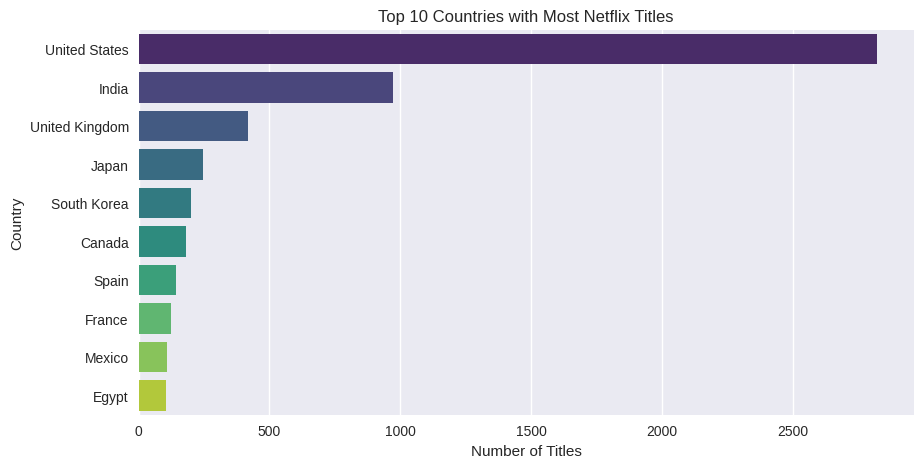

In [25]:
# 3. Top 10 Countries with Most Titles
top_countries = netflix['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


### **Why this plot ?**
To identify which countries dominate Netflix’s content production.  

### **Insights:**
- USA leads strongly, followed by India, UK, Canada.  
- Globalization of content is evident with entries from Japan, South Korea.  


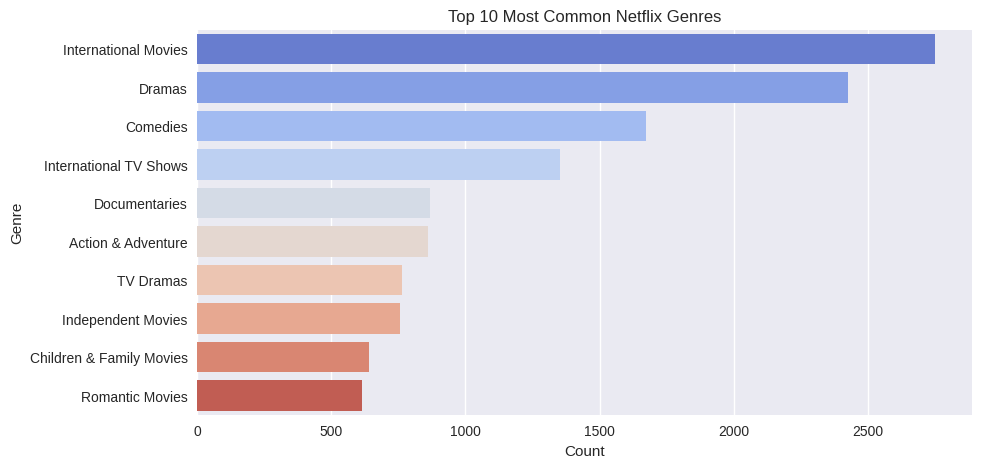

In [26]:
# 4. Most Common Genres
genres = netflix['listed_in'].dropna().str.split(', ')
flat_genres = [g for sub in genres for g in sub]
genre_counts = Counter(flat_genres).most_common(10)

plt.figure(figsize=(10,5))
sns.barplot(x=[g[1] for g in genre_counts], y=[g[0] for g in genre_counts], palette="coolwarm")
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


###** Why this plot ?**
To explore genre diversity on Netflix.  

### **Insights :**
- Drama and Comedy dominate Netflix’s library.  
- Rise of International TV Shows highlights Netflix’s global strategy.  


# **The Office Analysis**

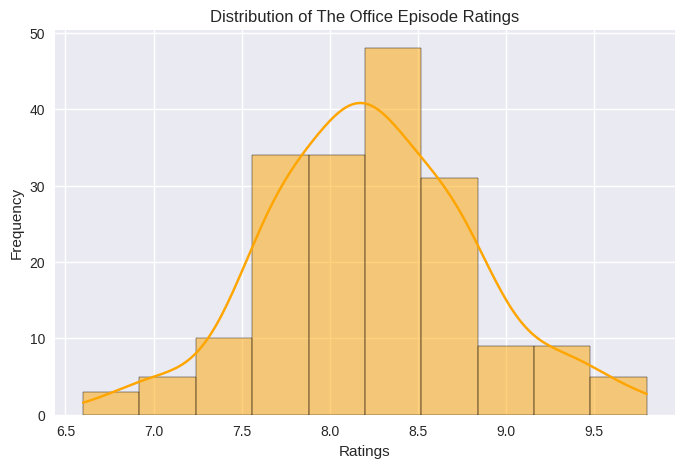

In [28]:
# 1 . Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(office['Ratings'], bins=10, kde=True, color="orange")
plt.title("Distribution of The Office Episode Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

### **Why this plot ?**
To see overall spread of episode ratings.  
### **Insights:**
- Most episodes rated 7–9, showing consistent audience love.  
- Very few episodes rated <7 → consistent quality.  


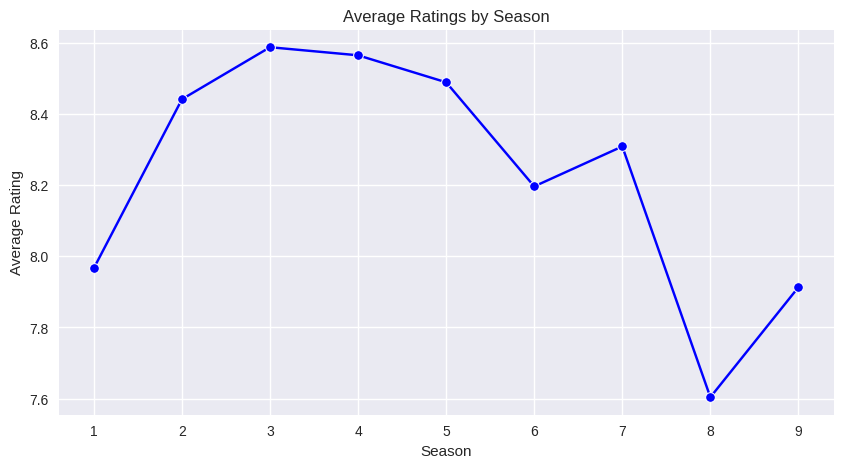

In [30]:
#2. Season-wise Average Ratings
season_avg = office.groupby('Season')['Ratings'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=season_avg, x='Season', y='Ratings', marker='o', color="blue")
plt.title("Average Ratings by Season")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.show()


### **Why this plot ?**
To compare popularity across seasons.  

### **Insights:**
- Seasons 2–5 were peak era with highest ratings.  
- Ratings declined slightly in final season (common for long-running shows).  


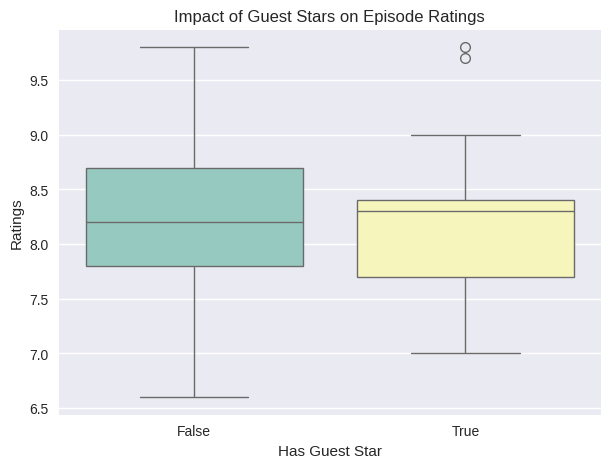

In [32]:
# 3. Guest Stars vs Ratings
plt.figure(figsize=(7,5))
sns.boxplot(data=office, x='has_guest', y='Ratings', palette="Set3")
plt.title("Impact of Guest Stars on Episode Ratings")
plt.xlabel("Has Guest Star")
plt.ylabel("Ratings")
plt.show()


### **Why this plot ?**
To check if guest stars improved audience ratings.  

### **Insights:**
- Episodes with **guest stars** had slightly **higher ratings on average**.  
- Star power positively influenced audience reception.  



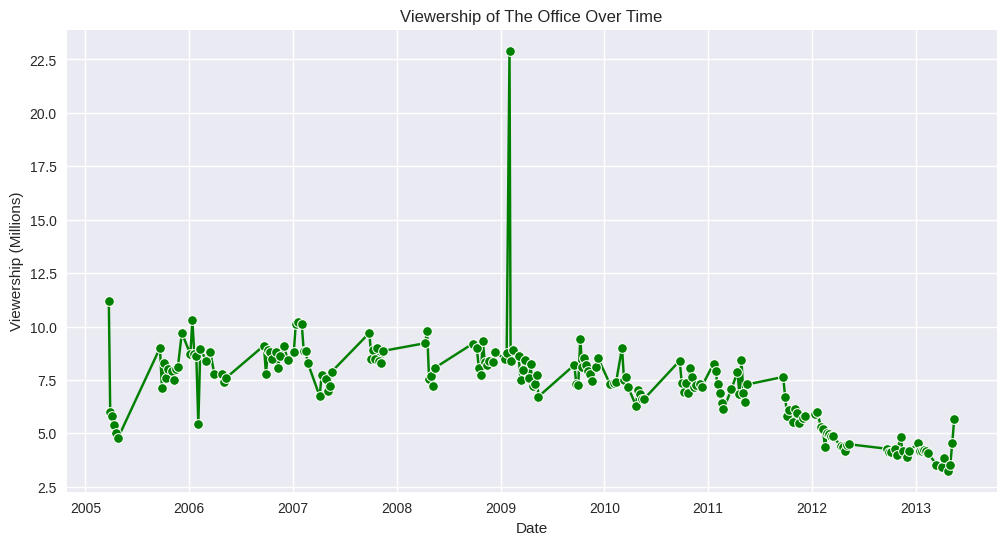

In [34]:
# 4. Viewership Trend Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=office, x='Date', y='Viewership', marker='o', color="green")
plt.title("Viewership of The Office Over Time")
plt.xlabel("Date")
plt.ylabel("Viewership (Millions)")
plt.show()


### **Why this plot ?**
To analyze real-world audience viewership trends.  

### **Insights:**
- Early seasons had strong viewership (~10M+).  
- Viewership declined steadily in later seasons despite high IMDB ratings.  


# **Combined Analysis**


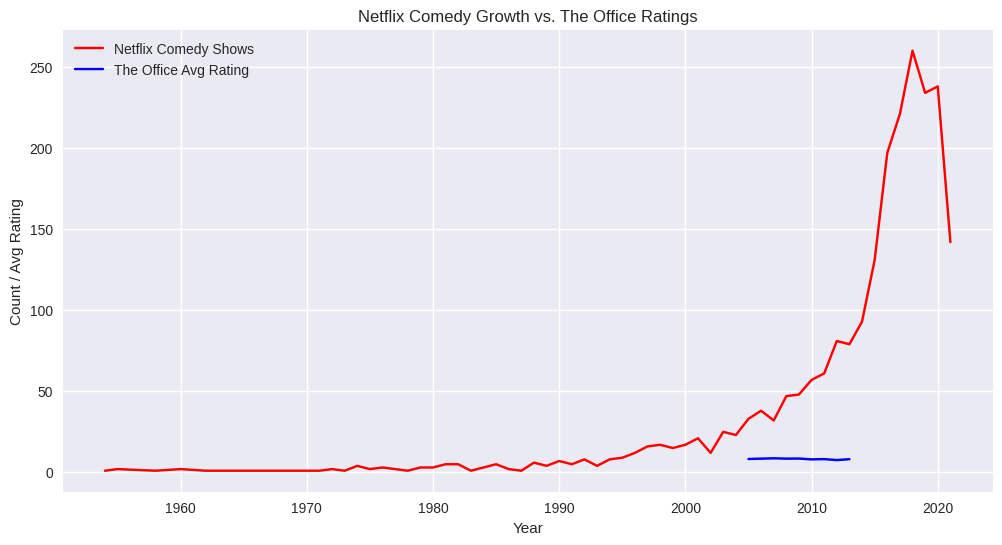

In [35]:
# 1. Netflix Comedy vs The Office Ratings
comedy = netflix[netflix['listed_in'].str.contains("Comedies", na=False)]
comedy_year = comedy.groupby('release_year').size().reset_index(name='count')

office_trend = office.groupby(office['Date'].dt.year)['Ratings'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(comedy_year['release_year'], comedy_year['count'], label="Netflix Comedy Shows", color="red")
plt.plot(office_trend['Date'], office_trend['Ratings'], label="The Office Avg Rating", color="blue")
plt.title("Netflix Comedy Growth vs. The Office Ratings")
plt.xlabel("Year")
plt.ylabel("Count / Avg Rating")
plt.legend()
plt.show()


### **Why this plot ?**
To connect Netflix’s comedy growth with The Office timeline.  

### **Insights:**
- The Office peaked between 2005–2010.  
- Netflix comedy content exploded post-2015, filling the void after The Office.  


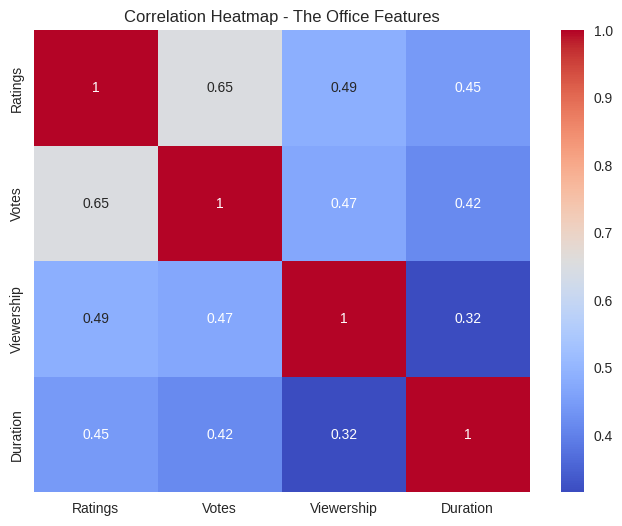

In [37]:
# 2. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(office[['Ratings','Votes','Viewership','Duration']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - The Office Features")
plt.show()


### **Why this plot ?**
To find relationships between numeric features.  

### **Insights:**
- Votes positively correlated with ratings bold text → Popular episodes are rated more.  
- Viewership not strongly tied to IMDB ratings → live TV vs online ratings differ.  


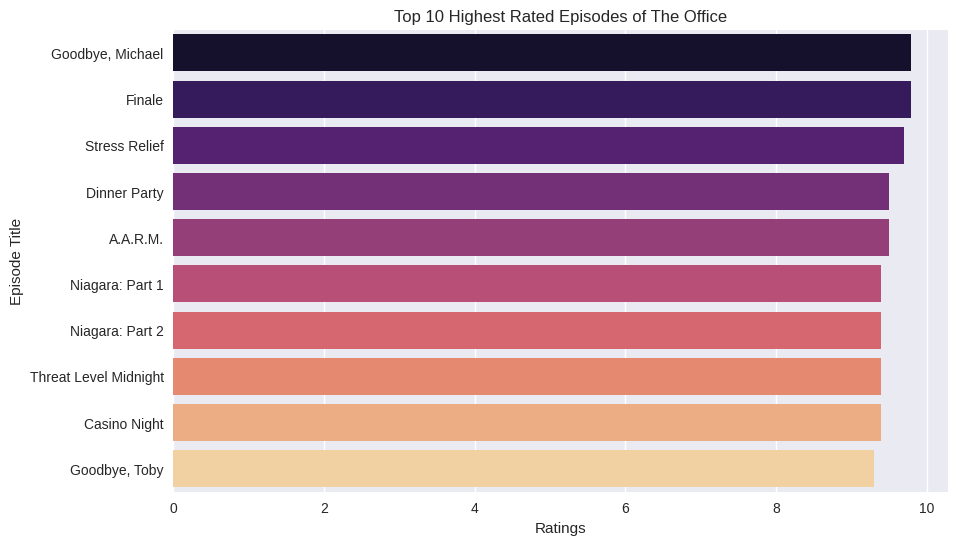

In [39]:
# 3. Top Rated Episodes
top_eps = office.sort_values('Ratings', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Ratings', y='EpisodeTitle', data=top_eps, palette="magma")
plt.title("Top 10 Highest Rated Episodes of The Office")
plt.xlabel("Ratings")
plt.ylabel("Episode Title")
plt.show()


### **Why this plot ?**
To highlight best-performing episodes.  

### **Insights:**
- Fan-favorite episodes often feature memorable guest stars or iconic storylines.  
- High ratings clustered in Seasons 2–5.  


#  **Conclusion**
- Netflix library is movie-heavy, but TV Shows are rising.  
- USA leads Netflix content, with India and UK contributing strongly.  
- The Office maintained consistently high ratings, peaking in Seasons 2–5.  
- Guest stars had a positive impact on ratings.  
- Netflix’s comedy growth boomed post-2015, after The Office’s TV peak ended.  
